# Resources on Stochastic Gradient Descent

from GFG :

[Stochastic Gradient Descent:](https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/)

And a Medium article :

[Stochastic Gradient Descent:](https://mohitmishra786687.medium.com/stochastic-gradient-descent-a-basic-explanation-cbddc63f08e0)

# Question 1


How does the learning rate affect the convergence of Stochastic Gradient Descent, and what are some common strategies for choosing or adapting the learning rate during training?



The learning rate determines how much the model parameters are updated at each step during training.It plays a crucial role in how fast and how well
 Stochastic Gradient Descent converges.
 If the learning rate is too small, the model learns very slowly. Although it may move steadily toward the minimum of the loss function, it can take
 a very long time to converge, especially for large datasets.
 If the learning rate is too large, the updates become unstable. Instead of moving toward the minimum, the model may overshoot it, causing the loss to
 fluctuate or even increase. In such cases, the algorithm may fail to converge.

Common strategies for choosing or adapting the learning rate :

One common strategy is manual tuning, where different learning rates are tried and the one that gives the best performance on validation data is 
selected.
Another approach is learning rate decay, where the learning rate is reduced gradually during training. This allows the model to make larger updates
 at the beginning and smaller, more precise updates as it approaches the minimum.
Adaptive learning rate methods are also widely used. Algorithms such as AdaGrad, RMSProp, and Adam automatically adjust the learning rate based on
 past gradients. These methods reduce the need for manual tuning and often lead to faster and more stable convergence.



#  Question 2

"`Gradient Descent vs Stochastic Gradient Descent`

Using the same preprocessed dataset from Question 2 from assignment-2'1, do the following:

a) Train a Linear Regression model using Batch Gradient Descent (GD)

b) Train a Linear Regression model using Stochastic Gradient Descent (SGD)

c) Choose suitable values for learning rate and number of epochs.

d) Predict house prices for the test dataset using both models.

e) Evaluate both models using:
Mean Squared Error (MSE) / R² Score

f) Print the evaluation results of GD and SGD in a clear comparison format.

g) Change the learning rate and epochs of the SGD model and observe how the performance changes.

h) Explain why does the SGD path behave so erratically compared to the GD path, and despite this "noise," why might SGD be preferred for very large datasets?

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score


# a) Load and prepare dataset
df = pd.read_csv("Real estate.csv")
df = df.drop(df.columns[0], axis=1)

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# b) Batch Gradient Descent model
class LinearRegressionGD:
    def __init__(self, lr=0.01, epochs=2000):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b


# c) Stochastic Gradient Descent model
class LinearRegressionSGD:
    def __init__(self, lr=0.01, epochs=50):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for i in range(n_samples):
                xi = X[i]
                yi = y[i]
                y_pred = np.dot(xi, self.w) + self.b
                dw = xi * (y_pred - yi)
                db = (y_pred - yi)
                self.w -= self.lr * dw
                self.b -= self.lr * db

    def predict(self, X):
        return np.dot(X, self.w) + self.b


# d) Train both models
gd_model = LinearRegressionGD(lr=0.01, epochs=2000)
sgd_model = LinearRegressionSGD(lr=0.01, epochs=50)

gd_model.fit(X_train, y_train)
sgd_model.fit(X_train, y_train)


# e) Predictions
y_pred_gd = gd_model.predict(X_test)
y_pred_sgd = sgd_model.predict(X_test)


# f) Evaluation (MSE and R2)
mse_gd = mean_squared_error(y_test, y_pred_gd)
r2_gd = r2_score(y_test, y_pred_gd)

mse_sgd = mean_squared_error(y_test, y_pred_sgd)
r2_sgd = r2_score(y_test, y_pred_sgd)

print("\nModel Comparison")
print("----------------------------")
print(f"Batch GD -> MSE: {mse_gd:.2f}, R2: {r2_gd:.3f}")
print(f"SGD      -> MSE: {mse_sgd:.2f}, R2: {r2_sgd:.3f}")


# g) Change SGD hyperparameters
sgd_model_tuned = LinearRegressionSGD(lr=0.05, epochs=100)
sgd_model_tuned.fit(X_train, y_train)

y_pred_tuned = sgd_model_tuned.predict(X_test)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print("\nSGD after hyperparameter change")
print("----------------------------")
print(f"SGD (lr=0.05, epochs=100) -> MSE: {mse_tuned:.2f}, R2: {r2_tuned:.3f}")




Model Comparison
----------------------------
Batch GD -> MSE: 69.05, R2: 0.565
SGD      -> MSE: 69.02, R2: 0.565

SGD after hyperparameter change
----------------------------
SGD (lr=0.05, epochs=100) -> MSE: 144.26, R2: 0.091


""" 
Stochastic Gradient Descent updates model parameters using only one data point at a time, which introduces randomness in the optimization path.
Because of this, the parameter updates fluctuate and the learning curve appears noisy compared to Batch Gradient Descent.

Despite this noise, SGD is preferred for very large datasets because it is much faster and requires less memory. The randomness also helps the model 
escape shallow local minima and reach a good solution efficiently. 

# Question 3

## Decision Trees


### 3.1 Theoretical and Numerical Questions

a) Is a **Decision Tree** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is **entropy** in the context of decision trees?

c) What does **reduction in entropy** signify when a node is split in a decision tree?

d) You are given a dataset consisting of **10 data points**, each having:
- A class label (+ or −)
- A 2D feature vector $(x, y)$

All data points are initially present at the **root node** of a decision tree.

A **decision stump** (depth = 1 decision tree) is to be learned at the root using the **entropy reduction principle**.

**Allowed split questions:**


- ($x \le -2$?)
- ($x \le 2$?)
- ($y \le 2$?)

**Assumptions:**
- All logarithms are **base 2**


- $\log_2 3 = 1.58$
- $\log_2 5 = 2.32$

- Give answers **correct to at least 2 decimal places**

|S.No. | Class | (x, y) |
|----|-------|--------|
| 1  | − | (−3, 0) |
| 2  | + | (3, 3) |
| 3  | + | (1, 1) |
| 4  | + | (1, −1) |
| 5  | + | (−1, 1) |
| 6  | + | (−1, −1) |
| 7  | − | (1, 5) |
| 8  | − | (1, 3) |
| 9  | − | (−1, 5) |
| 10 | − | (−1, 3) |


Answer the following:
1. Compute the **entropy of the root node**
2. Compute the **entropy of the two child nodes** for each allowed split
3. Compute the **reduction in entropy** for each split
4. Identify **which split should be chosen** based on maximum entropy reduction




a) Is a Decision Tree supervised or unsupervised?
A Decision Tree is a supervised learning algorithm.
It is trained using labeled data, where both input features and correct output labels are known. During training, the tree learns rules to predict
the target value based on the input features.

b) What is entropy in the context of decision trees?
Entropy is a measure of impurity or randomness in a dataset.
It tells us how mixed the data is at a particular node. If node contains data from only one class,its entropy is zero, meaning it is completely pure.

c) What does reduction in entropy signify when a node is split?
Reduction in entropy indicates that the split has made the data more pure.
A higher reduction means the feature used for splitting separates the classes better, making it a good choice for building the decision tree.

d)Identify **which split should be chosen** based on maximum entropy reduction

1. Entropy of the root node = 1.00
2. Entropy of child nodes after split
For split x ≤ −2, entropy of the two child nodes = 0.89
For split x ≤ 2, entropy of the two child nodes = 0.89
For split y ≤ 2, entropy of the two child nodes = 0.36

3. Reduction in entropy:
For split x ≤ −2, reduction in entropy = 0.11
For split x ≤ 2, reduction in entropy = 0.11
For split y ≤ 2, reduction in entropy = 0.64

4. Based on maximum entropy reduction, split y ≤ 2 should be chosen because it gives the highest entropy reduction

### 3.2 Coding Question (Decision Tree using Iris Dataset)

Write a Python program to **train and visualize a Decision Tree classifier** using the **Iris dataset**.

Your code should:
- Load the Iris dataset from `sklearn.datasets`
- Split the data into **70% training** and **30% testing** sets
- Train a Decision Tree classifier
- Plot the learned decision tree with appropriate **feature names** and **class labels**


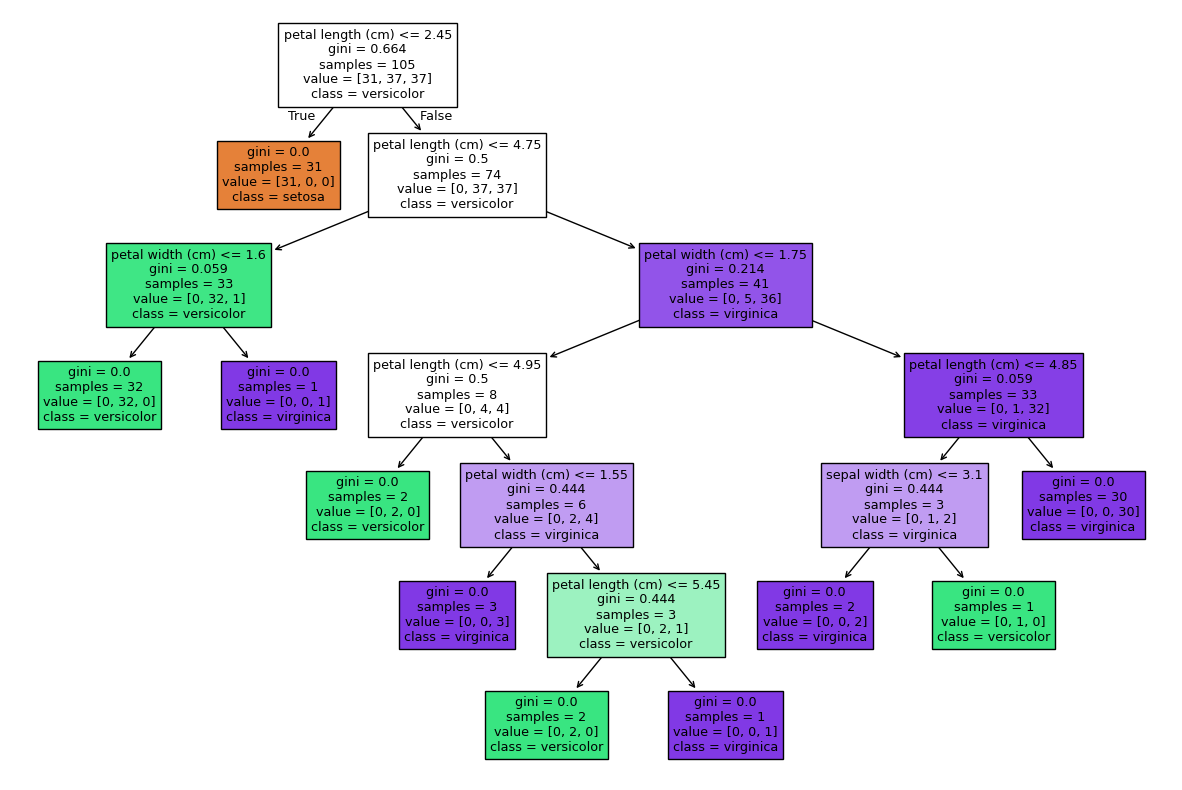

In [5]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(
    dt_model,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    filled=True
)
plt.show()


# Question 4

## Support Vector Machines (SVM)


### 4.1 Theoretical

a) Is a **Support Vector Machine (SVM)** a supervised or unsupervised learning algorithm?  
Give a brief explanation.

b) What is a **margin** in SVM?  
Why does SVM aim to maximize the margin?

c) What are **support vectors**?  
Why are they important in defining the decision boundary?

d) What is the purpose of a **kernel function** in SVM?  
Name any two commonly used kernel functions.



a) Is SVM supervised or unsupervised?

A Support Vector Machine (SVM) is a supervised learning algorithm.
It learns from labeled training data and uses these labels to classify new data points or make predictions.

b) What is a margin in SVM and why is it maximized?

The margin is the distance between the decision boundary and the closest data points from each class.
SVM tries to maximize the margin because a larger margin generally leads to better generalization and makes the model more robust to noise.

c) What are support vectors and why are they important?

Support vectors are the data points that lie closest to the decision boundary.
They are important because they directly define the position of the boundary. Removing or changing these points would change the decision boundary.

d) What is the purpose of a kernel function in SVM? Name two kernels.

A kernel function allows SVM to handle non-linear data by mapping it into a higher-dimensional space where it becomes easier to separate.

Two commonly used kernel functions are:

1.Linear kernel

2.Radial Basis Function (RBF) kernel

### 4.2 Conceptual

a) In a linearly separable dataset, how does SVM choose the **optimal separating hyperplane**?

b) What happens when the data is **not linearly separable**?  
Briefly explain how SVM handles this situation.

c) What is the role of the **regularization parameter `C`** in SVM?  
What happens when `C` is:
- Very large  
- Very small  

a) How does SVM choose the optimal separating hyperplane in a linearly separable dataset?

In a linearly separable dataset, SVM chooses the hyperplane that maximizes the margin between the two classes.
This hyperplane is placed so that the closest data points from both classes are as far away from it as possible.

b) What happens when the data is not linearly separable?

When the data is not linearly separable, SVM allows some data points to be misclassified using a soft margin approach.
It may also use a kernel function to transform the data into a higher-dimensional space where a linear separation becomes possible.

c) What is the role of the regularization parameter C in SVM?

The parameter C controls the trade-off between margin size and classification error.

When C is very large:
SVM tries to classify all training points correctly, which can lead to a smaller margin and possible overfitting.

When C is very small:
SVM allows more misclassifications, resulting in a larger margin and better generalization, but possibly lower training accuracy.